### **Spam Detection with MultinomialNB**
**Goal:** Build a spam classifier using the Naive Bayes algorithm and text feature extraction
(TF-IDF or Bag-of-Words).

**Install Required Dataset**

In [ ]:
import kagglehub
uciml_sms_spam_collection_dataset_path = kagglehub.dataset_download('uciml/sms-spam-collection-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sms-spam-collection-dataset/spam.csv


**Preprocess the Data**

In [ ]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Convert labels to binary: spam = 1, ham = 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check class balance
df['label'].value_counts()

,count
label,
0,4825
1,747


**Split into Train/Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)


**Convert Text to Vectors (TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit on train and transform both sets
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Train Multinomial Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Create and train model

model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

**Evaluate the Model**

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



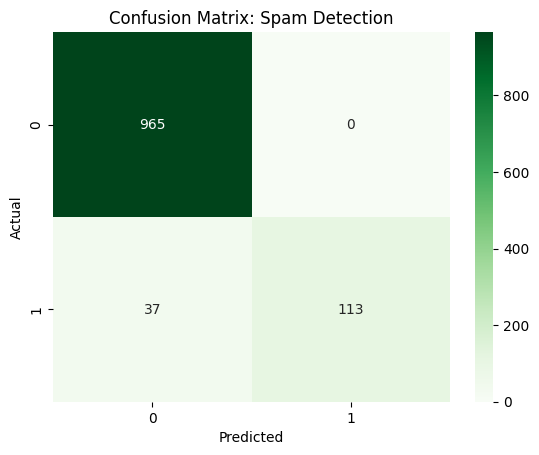

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test_vec)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Spam Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Summary:**


*   ✅ **Dataset:** SMS Spam Collection (UCI)
*   📊 **Objective:** Classify SMS messages as spam or ham
*   🔧 **Preprocessing:** Converted labels to binary (ham = 0, spam = 1), Transformed text into numerical vectors using TF-IDF
*   🤖 **Model:** Multinomial Naive Bayes
*   📈 **Evaluation Results:**

Accuracy: 96.7%,

Precision: 100% for spam,

Recall: 75% for spam,

F1-Score: 86% for spam


✅ **Conclusion:** The model is highly accurate and effective in detecting spam messages, though recall for spam can be improved.